In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report

D:\Anaconda3\envs\DeepLearning TF modulekeras\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

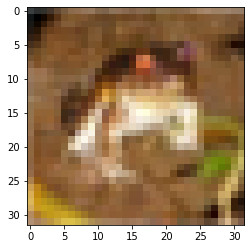

In [5]:
plt.imshow(x_train[0])

In [6]:
y_test[0]

array([3], dtype=uint8)

In [7]:
x_train[0].max()

255

In [8]:
#Standarizationn
x_train = x_train/255
x_test = x_test/255

In [9]:
#first we cover in categories and here, we take num_classes=10 because in dataset total 10 image
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu')) # rectified linear unit ativation
model.add(MaxPool2D(pool_size=(2,2))) # pool_size always half of kernel_size
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu')) # rectified linear unit ativation
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten()) # 32, 32, 3 = 32*32*3 = 3072

model.add(Dense(256, activation='relu')) #he we take 256 because  3072/10 so nearest is 256
model.add(Dense(10, activation='softmax')) # 10 cats output 1 cat

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test),
         callbacks=[early_stop])#epochs=15 means 15 time run but here we add early stop means stop early and 

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 49s 979us/sample - loss: 1.5157 - accuracy: 0.4523 - val_loss: 1.2869 - val_accuracy: 0.5360
Epoch 2/15
50000/50000 [==============================] - 46s 919us/sample - loss: 1.1835 - accuracy: 0.5837 - val_loss: 1.1297 - val_accuracy: 0.6007
Epoch 3/15
50000/50000 [==============================] - 45s 908us/sample - loss: 1.0377 - accuracy: 0.6351 - val_loss: 1.0227 - val_accuracy: 0.6448
Epoch 4/15
50000/50000 [==============================] - 46s 912us/sample - loss: 0.9236 - accuracy: 0.6747 - val_loss: 0.9970 - val_accuracy: 0.6577
Epoch 5/15
50000/50000 [==============================] - 44s 889us/sample - loss: 0.8352 - accuracy: 0.7098 - val_loss: 0.9917 - val_accuracy: 0.6579
Epoch 6/15
50000/50000 [==============================] - 45s 902us/sample - loss: 0.7585 - accuracy: 0.7364 - val_loss: 1.0560 - val_accuracy: 0.6481
Epoch 7/15
50000/50000 [====================

In [17]:
metrics = pd.DataFrame(model.history.history)

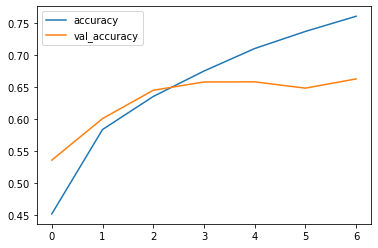

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
pred = model.predict_classes(x_test)

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [24]:
print(classification_report(y_test, pred ))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1000
           1       0.83      0.73      0.78      1000
           2       0.65      0.46      0.54      1000
           3       0.43      0.55      0.48      1000
           4       0.60      0.66      0.63      1000
           5       0.52      0.61      0.56      1000
           6       0.75      0.74      0.74      1000
           7       0.81      0.68      0.74      1000
           8       0.80      0.72      0.76      1000
           9       0.63      0.85      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.67     10000
weighted avg       0.68      0.66      0.67     10000

